$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + e_i$  

$b = (X^TX)^{−1} X^TY$

# Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from linear_regression import LinearRegression as lr

data = pd.read_csv("../data/Small-diameter-flow.csv", index_col=0)

# Explorative data analysis

<Axes: >

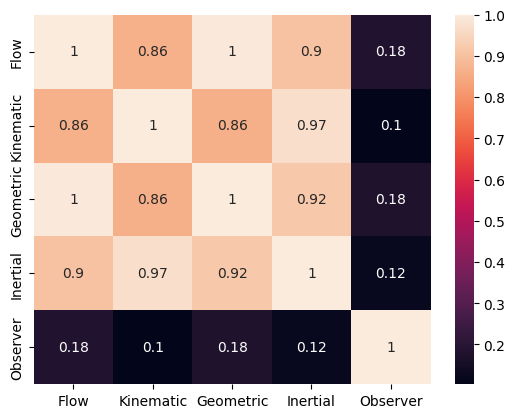

In [2]:
sns.heatmap(data.corr(), annot=True)

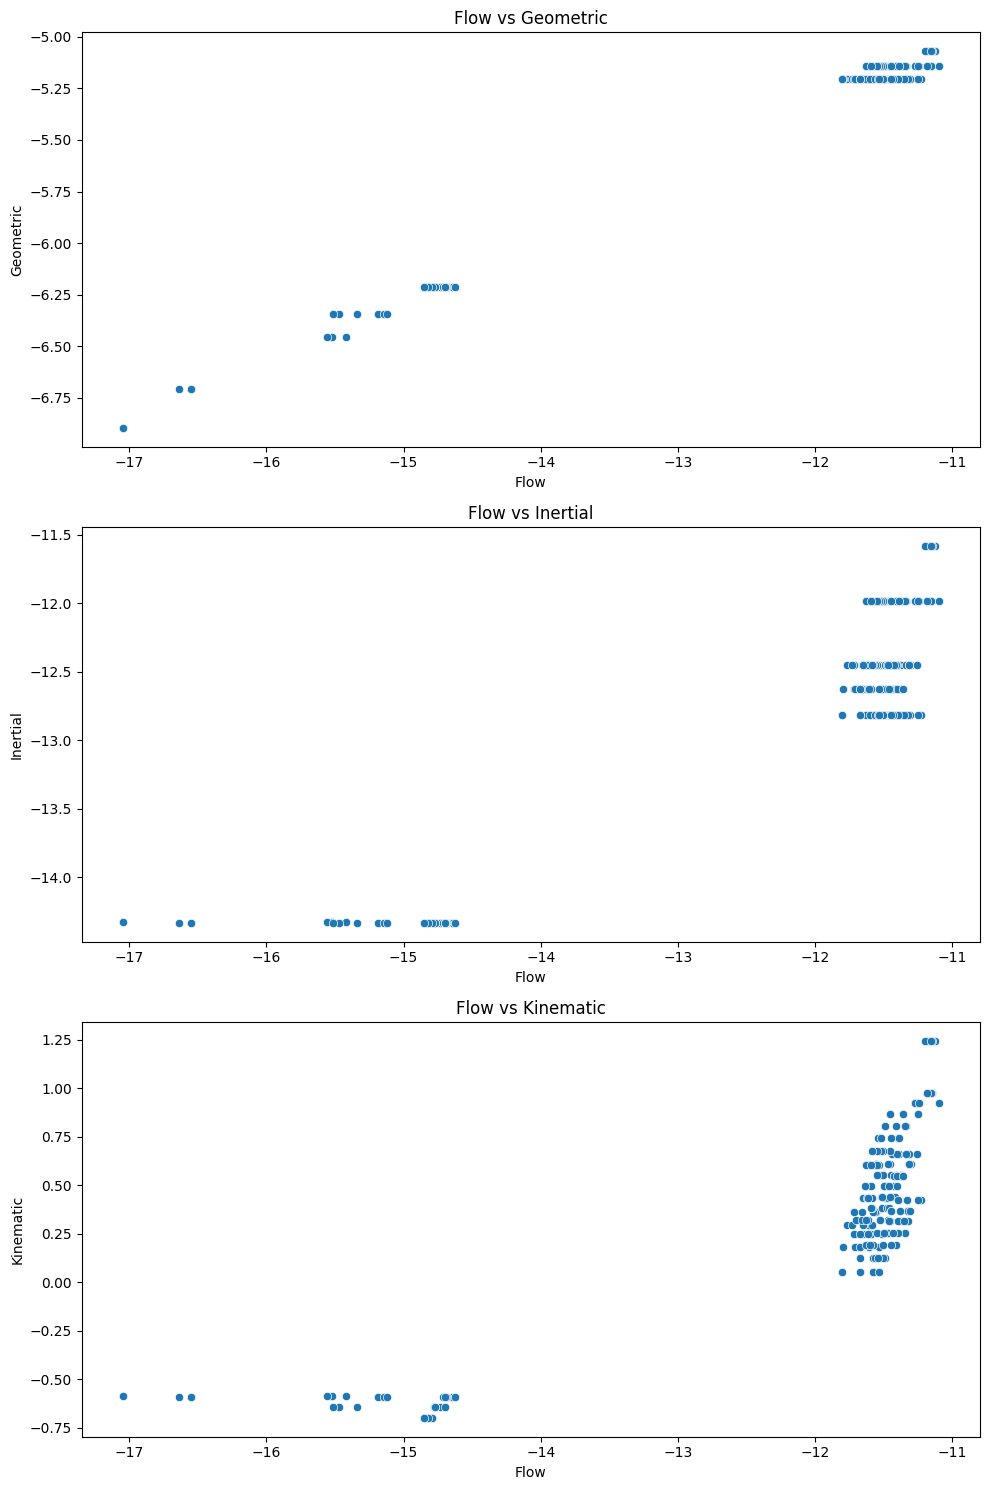

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.scatterplot(data=data, x="Flow", y="Geometric", ax=axes[0])
axes[0].set_title('Flow vs Geometric')

sns.scatterplot(data=data, x="Flow", y="Inertial", ax=axes[1])
axes[1].set_title('Flow vs Inertial')

sns.scatterplot(data=data, x="Flow", y="Kinematic", ax=axes[2])
axes[2].set_title('Flow vs Kinematic')

plt.tight_layout()
plt.show()

# Creating sets

In [4]:
# print(f"Length of ...\nX: {len(X)}")

data_shuffled = data.sample(frac=1, random_state=42)  # setting the seed for reproducibility

train_indices = round(0.8 * len(data_shuffled))
val_indices = round(0.25 * train_indices)
test_indices = round(0.2 * len(data_shuffled))

# print(f"Train:{train_indices}\nVal: {val_indices}\nTest: {test_indices}\n")

test_df = pd.DataFrame(data_shuffled[:test_indices])
train_df = pd.DataFrame(data_shuffled[test_indices:])

# print(f"Length of ...\nTrain: {len(train_df)}\nTest: {len(test_df)}\n")

val_df = pd.DataFrame(train_df[:val_indices])
train_df = pd.DataFrame(train_df[val_indices:])

# print(f"Length of ...\nTrain: {len(train_df)}\nVal: {len(val_df)}\n")

In [5]:
X_train = np.column_stack([np.ones(len(train_df)), train_df["Kinematic"], train_df["Geometric"], train_df["Inertial"], train_df["Observer"]])
y_train = train_df["Flow"]

X_val = np.column_stack([np.ones(len(val_df)), val_df["Kinematic"], val_df["Geometric"], val_df["Inertial"], val_df["Observer"]])
y_val = val_df["Flow"]

X_test = np.column_stack([np.ones(len(test_df)), test_df["Kinematic"], test_df["Geometric"], test_df["Inertial"], test_df["Observer"]])
y_test = test_df["Flow"]

# Running the model

In [7]:
model = lr()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
evaluation = model.evaluate(X_test, y_test)
evaluation

{'Syy1': np.float64(87.81306948077618),
 'Syy2': np.float64(87.81306948077552),
 'Variance': np.float64(0.00836071996361811),
 'Standard deviation': np.float64(0.09143697262933692),
 'R_squared': np.float64(0.9967628454346964),
 'RMSE': np.float64(0.08649071729367319),
 'F_stat': np.float64(2093.8102312455635),
 'F_pvalue': np.float64(2.747514192104818e-41),
 'p_values': [np.float64(4.904274326608841e-24),
  np.float64(4.904274323364126e-24),
  np.float64(2.4811437675466465e-38),
  np.float64(1.9768904516208276e-64),
  np.float64(1.2150603523737259e-39)]}